## Importing Libraries

In [16]:
import os
import random
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## Data Preparation

In [18]:
# path to the dataset
#data_dir = "dataset1/known_images"
data_dir = "dataset1/known_images"


# List of all image files in the dataset directory
file_list = os.listdir(data_dir)

# shuffle the images
# shuffle(file_list)

# Split the file list into training, validation, and test sets based on the ratios
train_, test_files = train_test_split(file_list, test_size=0.15, random_state=42) 
train_files, val_files = train_test_split(train_, test_size=0.15, random_state=42)

print("Number of all samples: {}".format(len(file_list)))
print("Number of training samples: {}".format(len(train_files)))
print("Number of Validation samples: {}".format(len(val_files)))
print("Number of test samples: {}".format(len(test_files)))


# Create separate directories for the training and test sets
train_dir = 'dataset1/training'
val_dir = 'dataset1/validation'
test_dir = 'dataset1/testing'

shutil.rmtree('dataset1/training', ignore_errors=True) 
os.mkdir('dataset1/training')

shutil.rmtree('dataset1/validation', ignore_errors=True) 
os.mkdir('dataset1/validation')

shutil.rmtree('dataset1/testing', ignore_errors=True) 
os.mkdir('dataset1/testing')


# Move the training set images to the train directory
#for file in train_files:
 #   class_label = file.split("_")[0]
  #  src_path = os.path.join(data_dir, file)
   # dst_path = os.path.join(train_dir, class_label, file)
    #os.makedirs(os.path.join(train_dir, class_label), exist_ok=True)
    #shutil.copy(src_path, dst_path)

# Move the validation set images to the val directory
#for file in val_files:
 #   class_label = file.split("_")[0]
  #  src_path = os.path.join(data_dir, file)
   # dst_path = os.path.join(val_dir, class_label, file)
    #os.makedirs(os.path.join(val_dir, class_label), exist_ok=True)
    #shutil.copy(src_path, dst_path)

# Move the test set images to the test directory
#for file in test_files:
 #   class_label = file.split("_")[0]
  #  src_path = os.path.join(data_dir, file)
   # dst_path = os.path.join(test_dir, class_label, file)
    #os.makedirs(os.path.join(test_dir, class_label), exist_ok=True)
    #shutil.copy(src_path, dst_path)
    
def move_files_to_directory(files, data_dir, target_dir):
    for file in files:
        class_label = file.split("_")[0]
        src_path = os.path.join(data_dir, file)
        dst_path = os.path.join(target_dir, class_label, file)
        os.makedirs(os.path.join(target_dir, class_label), exist_ok=True)
        shutil.copy(src_path, dst_path)

# Move the train set images to the train directory
def move_train_files(train_files, data_dir, train_dir):
    move_files_to_directory(train_files, data_dir, train_dir)

# Move the validation set images to the val directory
def move_val_files(val_files, data_dir, val_dir):
    move_files_to_directory(val_files, data_dir, val_dir)

# Move the test set images to the test directory
def move_test_files(test_files, data_dir, test_dir):
    move_files_to_directory(test_files, data_dir, test_dir)
    
move_train_files(train_files, data_dir, train_dir)
move_val_files(val_files, data_dir, val_dir)
move_test_files(test_files, data_dir, test_dir)



Number of all samples: 715
Number of training samples: 515
Number of Validation samples: 92
Number of test samples: 108


### EDA

### Loading the data

In [19]:
# Set the paths to the train, val, and test directories
train_data = "dataset1/training"
val_data = "dataset1/validation"
test_data = "dataset1/testing"


# Set the image size and batch size for training and validation data
img_size = (180, 180)
batch_size = 32 

# Create ImageDataGenerators for the training, validation, and test sets 
train_generator = tf.keras.utils.image_dataset_from_directory(
    train_data, 
    image_size=img_size, 
    batch_size=batch_size)

val_generator = tf.keras.utils.image_dataset_from_directory(
    val_data, 
    image_size=img_size,
    batch_size=batch_size)

test_generator = tf.keras.utils.image_dataset_from_directory(
    test_data, 
    image_size=img_size,
    batch_size=batch_size)

# Classes in the dataset 
class_names = train_generator.class_names
print("Class names: {}".format(class_names))

Found 515 files belonging to 2 classes.
Found 92 files belonging to 2 classes.
Found 108 files belonging to 2 classes.
Class names: ['normal', 'sick']


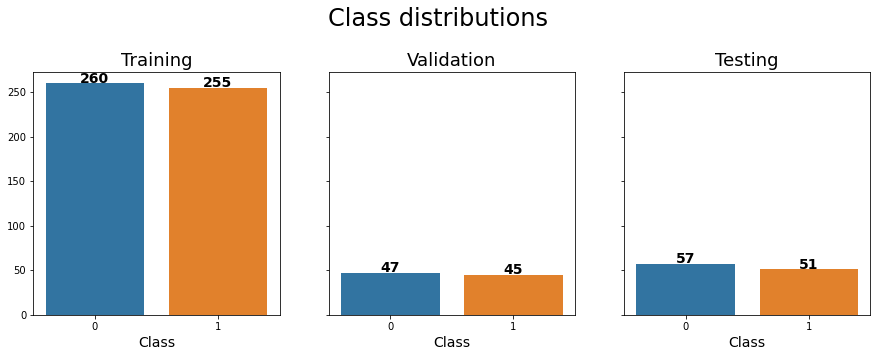

In [20]:
# statistics
def class_check(subset):
    dataset_unbatched = tuple(subset.unbatch())
    labels = []
    for (image,label) in dataset_unbatched:
        labels.append(label.numpy())
    labels = pd.Series(labels)
    return labels

def plot_class_distribution(data, title, ax):
    ax = sns.barplot(ax=ax, x=data.value_counts().index, y=data.value_counts())
    ax.set_title(title, fontsize=18)
    ax.set_xlabel('Class', fontsize=14)
    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(height, (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points', weight='bold')

train_labels = class_check(train_generator)
val_labels =  class_check(val_generator)
test_labels = class_check(test_generator) 

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Class distributions', fontsize=24)
plt.subplots_adjust(top=0.8)

plot_class_distribution(train_labels, 'Training', axes[0])
plot_class_distribution(val_labels, 'Validation', axes[1])
plot_class_distribution(test_labels, 'Testing', axes[2])
 
plt.show()

<ipython-input-21-c0c87fd4a285>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3, 3, i + 1)


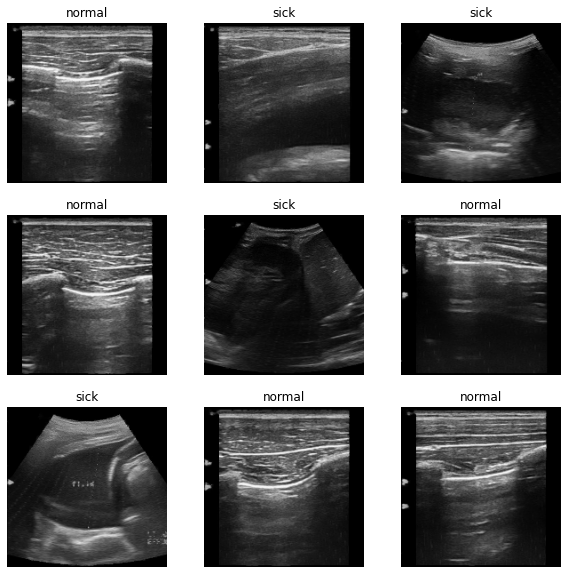

In [21]:
# Plot some sample images from the training set
plt.figure(figsize=(10, 10))
for images, labels in train_generator.take(2):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## The Model

Model Architecture


In [38]:
# Set the input shape and number of classes
input_shape = (180, 180, 3)
num_classes = 1

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 20, 20, 128)     

Model training

In [39]:
# Define model checkpointing
checkpoint_path = "model_checkpoint.h5"
callbacks = [
    ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1
                   ),
    
    EarlyStopping(
    monitor='val_accuracy',
    min_delta=1e-4,
    patience=4,
    verbose=1
    )
]

# Train the model with checkpointing
history = model.fit(
    train_generator, 
    epochs=10,
    validation_data=val_generator, 
    callbacks=[callbacks])

Epoch 1/10
17/17 [==============================] - ETA: 0s - loss: 102.0655 - accuracy: 0.6252
Epoch 1: val_accuracy improved from -inf to 0.48913, saving model to model_checkpoint.h5
17/17 [==============================] - 15s 771ms/step - loss: 102.0655 - accuracy: 0.6252 - val_loss: 1.4859 - val_accuracy: 0.4891
Epoch 2/10
17/17 [==============================] - ETA: 0s - loss: 0.5379 - accuracy: 0.7689
Epoch 2: val_accuracy improved from 0.48913 to 0.89130, saving model to model_checkpoint.h5
17/17 [==============================] - 13s 724ms/step - loss: 0.5379 - accuracy: 0.7689 - val_loss: 0.2993 - val_accuracy: 0.8913
Epoch 3/10
17/17 [==============================] - ETA: 0s - loss: 0.2645 - accuracy: 0.8990
Epoch 3: val_accuracy improved from 0.89130 to 0.92391, saving model to model_checkpoint.h5
17/17 [==============================] - 13s 747ms/step - loss: 0.2645 - accuracy: 0.8990 - val_loss: 0.1658 - val_accuracy: 0.9239
Epoch 4/10
17/17 [===========================

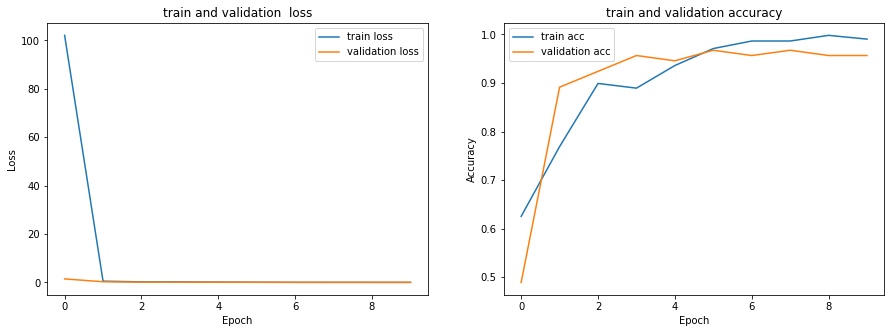

In [40]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train and validation  loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train loss', 'validation loss'])

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) 
plt.title('train and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train acc', 'validation acc'])
plt.show()

Model Evaluation

In [41]:
# Load the best model checkpoint
model.load_weights(checkpoint_path)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

4/4 [==============================] - 1s 119ms/step - loss: 0.1176 - accuracy: 0.9630
Test accuracy: 0.9629629850387573


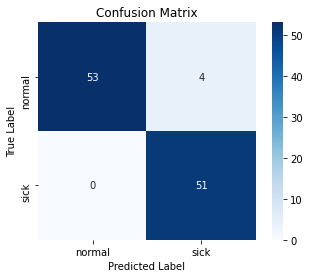

In [42]:
# Get the true labels and predicted labels for the test set  
true_labels = np.array([])
pred_labels = []  
for images, labels in test_generator: 
    true_labels = np.append(true_labels, np.squeeze(labels)) 
    # Use the model to make predictions
    predictions = np.squeeze(model.predict(images, verbose = 0).round().astype(int))
    pred_labels = np.append(pred_labels, predictions) 
# confusion matrix
conf_mat = confusion_matrix(true_labels, pred_labels) 
plt.imshow(conf_mat, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
sns.heatmap(conf_mat, annot=True,fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [43]:
print(classification_report(true_labels, pred_labels, target_names=class_names))

              precision    recall  f1-score   support

      normal       1.00      0.93      0.96        57
        sick       0.93      1.00      0.96        51

    accuracy                           0.96       108
   macro avg       0.96      0.96      0.96       108
weighted avg       0.97      0.96      0.96       108



### Getting predictions for unknown images

In [44]:
# path to the dataset
data_dir = "dataset1/unknown_images"

# List of all image files in the dataset directory
image_list = os.listdir(data_dir)
pred1_labels = []

for i in range(len(image_list)):
    im = image.load_img(data_dir+"/"+image_list[i], target_size=img_size)
    np_im = image.img_to_array(im)  
    prediction = np.round(np.squeeze(model.predict(np.expand_dims(np_im, axis=0), verbose=0))).astype(int) 
    pred1_labels.append(prediction)

# Save predictions to a csv  
pred_unknown = pd.DataFrame({'patient_image': image_list, 'model_prediction_labels': pred1_labels})
pred_unknown.to_csv('predications_unknown_images.csv', index=False)

### Testing performance of the model on dataset2

In [45]:
## Testing on dataset 2
# path to the dataset
data2_dir = "dataset2/images"
data2_labels = pd.read_csv("dataset2/image_classes.csv")
# sort the 
data2_labels = data2_labels.sort_values(by=['patient '] )
print(data2_labels.tail(10))

true_labels2 = data2_labels['diagnosis (0-Normal, 1-Sick)'].values 

# List of all image files in the dataset directory
image2_list = sorted(os.listdir(data2_dir)) 
print(image2_list[:5])

pred2_labels = []
for i in range(len(image2_list)):
    im = image.load_img(data2_dir+"/"+image2_list[i], target_size=img_size)
    np_im = image.img_to_array(im)  
    prediction = np.round(np.squeeze(model.predict(np.expand_dims(np_im, axis=0), verbose=0))).astype(int) 
    pred2_labels.append(prediction)
    
# Check to ensure the same order for actual labels and predicted labels based on image file(patien column)    
df = pd.DataFrame({'patient': [file.split('.')[0] for file in image2_list], 'model_predicted_diagnosis': pred2_labels})
print(df.tail(10))

#merge predicted labels to the csv file
data2_labels['model_prediction_diagnoses'] = pred2_labels
data2_labels.head()
data2_labels.to_csv('dataset2_predictions.csv', index=False)

       patient   diagnosis (0-Normal, 1-Sick)
202  sick_eif90                             1
203  sick_eif91                             1
204  sick_eif92                             1
205  sick_eif93                             1
206  sick_eif94                             1
207  sick_eif95                             1
208  sick_eif96                             1
209  sick_eif97                             1
210  sick_eif98                             1
211  sick_eif99                             1
['sick_eff0.png', 'sick_eff1.png', 'sick_eff10.png', 'sick_eff100.png', 'sick_eff101.png']
        patient  model_predicted_diagnosis
214  sick_eif90                          1
215  sick_eif91                          1
216  sick_eif92                          1
217  sick_eif93                          1
218  sick_eif94                          1
219  sick_eif95                          1
220  sick_eif96                          1
221  sick_eif97                          1
222  sick_eif98 

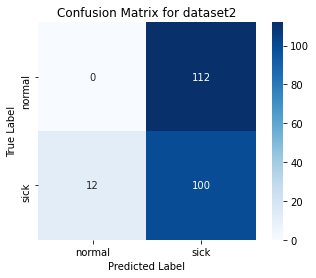

In [46]:
conf_mat = confusion_matrix(true_labels2, pred2_labels) 
plt.imshow(conf_mat, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for dataset2')
sns.heatmap(conf_mat, annot=True,fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [47]:
print(classification_report(true_labels2, pred2_labels, target_names=class_names))

              precision    recall  f1-score   support

      normal       0.00      0.00      0.00       112
        sick       0.47      0.89      0.62       112

    accuracy                           0.45       224
   macro avg       0.24      0.45      0.31       224
weighted avg       0.24      0.45      0.31       224

